In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import torch

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
torch.cuda.get_device_name(0)

'GeForce GTX 1060 3GB'

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
from pathlib import Path

In [7]:
# bs = 32
bs = 8

In [8]:
path = Path('.')
path_img = path / 'Preprocessed2'

In [9]:
df = pd.read_csv('./Degrees2.csv', dtype = {'Filename': str, 'mbar': np.float64}, index_col=0)
for index, row in df.iterrows():
    df.at[index,'Filename'] = path_img / df['Filename'][index]

In [10]:
df['Filename'][32].is_file()

True

In [11]:
df.head()

,Filename,Degree,CorrectDegree,mbar
0,Preprocessed2\IMG_5228.jpg,-54.904183,35.095817,51.834108
1,Preprocessed2\IMG_5229.jpg,-55.784298,34.215702,51.997092
2,Preprocessed2\IMG_5230.jpg,-55.619655,34.380345,51.966603
3,Preprocessed2\IMG_5231.jpg,-56.575189,33.424811,52.143553
4,Preprocessed2\IMG_5232.jpg,-53.880659,36.119341,51.644567


In [12]:
from fastai.vision import * 
from fastai.metrics import error_rate

In [13]:
test_path_img = path / 'PreporcessedAngledRotated'

In [14]:
data = (ImageList
        .from_df(path=path,df=df)
        .split_by_rand_pct()
        .label_from_df(cols='mbar',label_cls=FloatList)
        .add_test_folder(test_path_img)
        .transform(get_transforms(do_flip=False, max_rotate=30, max_zoom=1.1, max_lighting=0, max_warp=0, p_affine=1))
        .databunch(bs=bs, device=device)
        .normalize(imagenet_stats))

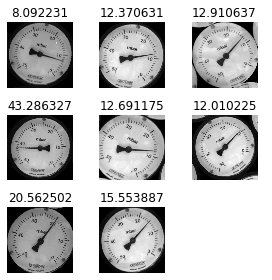

In [15]:
data.show_batch(rows=3, figsize=(4,4))

In [16]:
learner = cnn_learner(data, models.resnet34, metrics=mean_absolute_error)
#learner.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


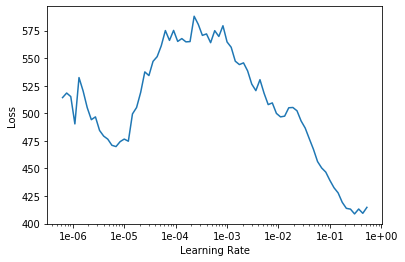

In [17]:
#learner.unfreeze()
learner.lr_find()
learner.recorder.plot()

In [18]:
learner.fit_one_cycle(100, slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,mean_absolute_error,time
0,527.718628,564.496826,20.234108,00:42
1,517.609192,543.226135,19.789520,00:39
2,532.735413,542.011169,19.845625,00:35
3,516.286865,532.098145,19.688738,00:39
4,503.237488,526.143921,19.694813,00:37
5,494.330231,512.764587,19.504993,00:36
6,461.642212,463.294708,18.490593,00:36
7,439.485046,445.560333,18.356480,00:36
8,413.494232,391.653320,17.278797,00:35
9,339.330383,289.964050,14.885155,00:36


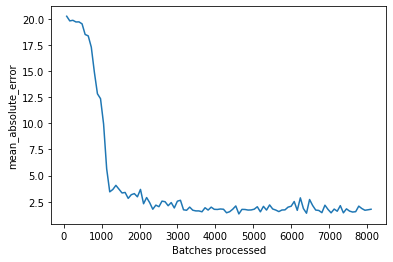

In [19]:
learner.recorder.plot_metrics()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


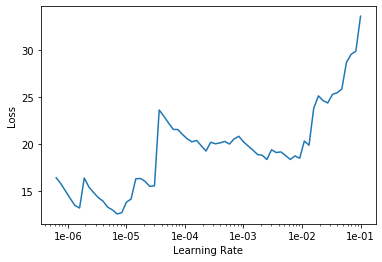

In [19]:
#learner.unfreeze()
learner.lr_find()
learner.recorder.plot()

In [20]:
learner.fit_one_cycle(100, slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,mean_absolute_error,time
0,21.880463,4.547549,1.485553,00:39
1,23.714518,7.947840,2.001280,00:38
2,23.309278,4.483342,1.521253,00:37
3,25.115620,3.648505,1.386657,00:35
4,22.621370,3.858994,1.462017,00:39
5,27.387909,4.925210,1.513736,00:38
6,28.673662,4.361413,1.493415,00:37
7,23.194391,3.663071,1.435222,00:36
8,22.752392,3.358989,1.500251,00:35
9,22.646357,5.117739,1.972039,00:36


In [36]:
learner.save("trained_model_v5", return_path=True)

WindowsPath('models/trained_model.pth')

In [16]:
testlearner = cnn_learner(data, models.resnet34, metrics=mean_absolute_error)
testlearner = testlearner.load("trained_model")

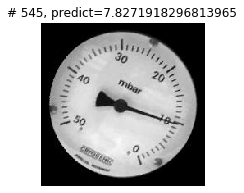

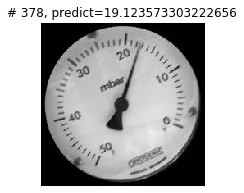

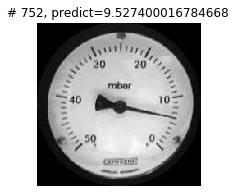

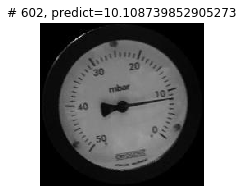

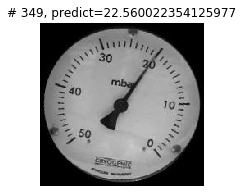

In [19]:
idxs = np.random.randint(0,900, size=5)
for idx in idxs:
    data.test_ds.x[idx]
    img = testlearner.data.test_ds.x[idx]
    img.show(title='# {}, predict={}'.format(idx, testlearner.predict(img)[1].numpy()[0]))